### Data Analysis
- 원시(원본 그대로의) 데이터를 분석하여 인사이트(가시성 증가 및 깊은 이해)로 변환하는 작업이다.
- 문제를 해결하기 위해 데이터를 사용해서 흐름 및 방향을 찾는 기술이다.
- 데이터 분석을 통해 비지니스 프로세스를 구성하고, 의사 결정을 개선하며, 비지니스 성장을 증진할 수 있다.

<img src="./images/architecture.png" width="900px" style="margin-left: 10px;">
** <sub>ETL은 Extract(추출), Transform(변환), Load(적재)를 의미한다. 여기저기 흩어진 데이터를 하나로 모으기 위한 결합 과정이다.</sub>

### 기초 통계(Basics Statistics)
📌통계는 아직 발생하지 않은 일을 예측하기 위해 사용한다.
- 통계학을 공부하는 데 있어 필요한 기본 개념이고,  
수량적인 비교를 기초로 많은 사실을 관찰하고 처리하는 방법을 연구하는 학문이다.
- 불균형 데이터를 대상으로 규칙성과 불규칙성을 발견한 뒤 실생활에 적용할 수 있다.

<img src="./images/statistics01.png" style="margin-top: 20px;">

#### 변량 (Variable)
- 자료의 수치를 변량이라고 하며, 이는 데이터의 값을 의미한다.

In [122]:
# 아래 코드의 주석을 해제하면 셀 내의 코드 전체를 처리하는 데 걸리는 시간이 출력된다
# %%timeit -n 100 -r 10

import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randint(151, 190, size=(10, 10)), \
                  columns="서울,경기,인천,광주,대구,부산,전주,강릉,울산,수원".split(","))

display(df)

서울   경기   인천   광주   대구   부산   전주   강릉   울산   수원
0  155  162  167  181  182  153  188  174  169  163
1  168  151  187  185  155  182  156  171  166  163
2  177  174  152  182  186  183  189  158  155  179
3  164  178  155  189  159  167  169  177  172  165
4  177  154  184  165  168  163  151  182  180  174
5  159  178  183  173  162  182  172  169  162  185
6  153  158  158  155  166  152  155  159  171  183
7  163  155  156  161  163  181  168  167  167  171
8  178  171  175  163  158  159  181  156  176  185
9  152  183  176  158  172  164  171  154  157  186

In [124]:
# %%timeit -n 100 -r 10

import pandas as pd
import random

df = pd.DataFrame([[random.randint(150, 190) for _ in range(10)] for _ in range(10)], \
                              columns="서울,경기,인천,광주,대구,부산,전주,강릉,울산,수원".split(","))

display(df)

서울   경기   인천   광주   대구   부산   전주   강릉   울산   수원
0  175  184  182  164  156  182  160  189  171  169
1  159  166  161  153  170  165  154  175  175  170
2  180  163  162  169  182  159  167  168  186  185
3  180  187  159  170  168  164  182  160  177  169
4  179  150  155  156  189  184  159  171  182  181
5  187  157  169  186  163  168  181  189  180  178
6  155  178  174  151  174  167  181  172  161  160
7  163  156  158  165  180  155  184  174  173  172
8  152  168  157  174  181  168  159  178  177  166
9  157  168  183  176  188  167  156  172  152  152

#### 계급 (Class)
- 변량을 일정 간격으로 나눈 구간을 의미한다.
- 변량의 최소값과 최대값을 잘 고려해서 계급을 정해야한다.
- 예를 들어, 150 ~ 160 계급이 있을 경우, 실질적으로 150 < (변량) <= 160 까지의 데이터가 여기에 속한다. 

In [125]:
df_seoul = df['서울']
df_class = pd.cut(df_seoul, bins=[150, 160, 170, 180, 190])
df_seoul_class = pd.DataFrame({'서울': df_seoul, '계급': df_class})
df_seoul_class

서울          계급
0  175  (170, 180]
1  159  (150, 160]
2  180  (170, 180]
3  180  (170, 180]
4  179  (170, 180]
5  187  (180, 190]
6  155  (150, 160]
7  163  (160, 170]
8  152  (150, 160]
9  157  (150, 160]

#### 도수 (Frequency)
- 각 계급에 속하는 변량의 '개수'를 의미한다.

In [126]:
df_seoul_class.groupby('계급', observed=True).count()

서울
계급            
(150, 160]   4
(160, 170]   1
(170, 180]   4
(180, 190]   1

#### 상대 도수 (Relative Frequency)
- 각 계급에 속하는 변량의 '비율'을 의미한다.

In [127]:
df_seoul_class.groupby('계급', observed=False).count().apply(lambda x: x / 100)

서울
계급              
(150, 160]  0.04
(160, 170]  0.01
(170, 180]  0.04
(180, 190]  0.01

#### 도수분포표 (Frequency Table)
- 주어진 자료를 계급별로 나눈 뒤, 각 계급에 속하는 도수 및 상대 도수를 조사한 표이다.
- 구간별 분포를 한 번에 알아보기 좋지만, 각 계급별 각 변량의 정확한 값이 생략되어있다.

In [128]:
freq_df = pd.DataFrame({'도수': df_seoul_class.groupby('계급', observed=False).count()["서울"], \
              '상대 도수': df_seoul_class.groupby('계급', observed=False).count().apply(lambda x: x / 100)["서울"]})

display(freq_df)

도수  상대 도수
계급                   
(150, 160]   4   0.04
(160, 170]   1   0.01
(170, 180]   4   0.04
(180, 190]   1   0.01

In [129]:
freq_df.reset_index(drop=False)

계급  도수  상대 도수
0  (150, 160]   4   0.04
1  (160, 170]   1   0.01
2  (170, 180]   4   0.04
3  (180, 190]   1   0.01

#### 히스토그램 (Histogram)
- 도수분포표를 시각화한 그래프이다.

<Axes: >

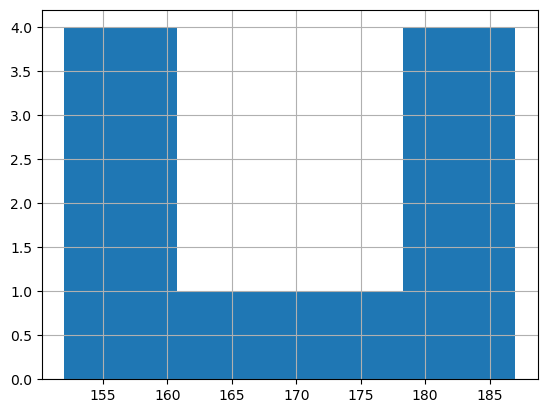

In [130]:
import matplotlib.pyplot as plt
import numpy as np

df_seoul_class["서울"].hist(bins=4)

#### 산술 평균 (Mean)
- 변량의 합을 변량의 수로 나눈 값을 의미한다.

<img src="./images/mean.png" style="margin-left: 20px;">

In [131]:
df.mean(axis=0).to_frame(name="평균 키")

평균 키
서울  168.7
경기  167.7
인천  166.0
광주  166.4
대구  175.1
부산  167.9
전주  168.3
강릉  174.8
울산  173.4
수원  170.2

#### 편차 (Deviation)
- 변량에서 평군을 뺀 값이다.
- 각 편량의 편차를 구한 뒤 모두 합하면 0이 되기 때문에, 편차의 평균은 구할 수 없다.

In [135]:
gyeonggi_df = df["경기"].to_frame()

gyeonggi_df["편차"] = gyeonggi_df["경기"].apply(lambda x: x - gyeonggi_df.mean())

display(gyeonggi_df)

# e는 매우 작은 수 또는 매우 큰 수를 간략화 해주는 기능이다.
# 이 때, e는 수갛에서의 자연상수가 아닌, 과학적 기수법 e라고 한다.
# (a)e(b) = a * 10^b
print(gyeonggi_df["편차"].sum())

# 실수의 오류를 원래 값으로 변경하고자 반올림(round) 사용
total = round(gyeonggi_df["편차"].sum())
print(f'편차의 합: {total}')

경기    편차
0  184  16.3
1  166  -1.7
2  163  -4.7
3  187  19.3
4  150 -17.7
5  157 -10.7
6  178  10.3
7  156 -11.7
8  168   0.3
9  168   0.3

1.1368683772161603e-13
편차의 합: 0


#### 분산 (Variance)
- 변량이 평균으로부터 떨어져있는 정도를 보기 위한 통계량이다.
- 편차를 제곱하여 그 합을 구한 뒤 산술 평균을 낸다.

<img src="./images/variance.png" style="margin-left: 20px;">

In [133]:
gyeonggi_df["편차의 제곱(분산)"] = gyeonggi_df["편차"].apply(lambda x: x ** 2)

display(gyeonggi_df)

variance = gyeonggi_df["편차의 제곱(분산)"].mean()
print(f'분산: {round(variance, 2)}')

경기    편차  편차의 제곱(분산)
0  184  16.3      265.69
1  166  -1.7        2.89
2  163  -4.7       22.09
3  187  19.3      372.49
4  150 -17.7      313.29
5  157 -10.7      114.49
6  178  10.3      106.09
7  156 -11.7      136.89
8  168   0.3        0.09
9  168   0.3        0.09

분산: 133.41


#### 표준편차 (Standard Deviation)
- 분산의 제곱근이며, 관측된 변량의 흩어진 정도를 하나의 수치로 나타내는 통계량이다.
- 표준편차가 작을수록 평균 값에서 변량들의 거리가 가깝다고 판단한다.

<img src="./images/standard_deviation.png" style="margin-left: 15px;">

In [134]:
import math

std = math.sqrt(variance)

print(f'표준편차: {std}')

표준편차: 11.550324670761423


#### 확률변수 (Random Variable)
- 머신러닝, 딥러닝 등, 확률을 다루는 분야에 있어서 필수적인 개념이다.
- 확률(probablity)이 있다는 뜻은 사건(event)이 있다는 뜻이며,  
  시행(trial)을 해야 시행의 결과인 사건(event)이 나타난다.
- 시행(trial)을 해서 어떤 사건(event)이 나타났는지에 따라 값이 정해지는 변수이다.
- 알파벳 대문자로 표현하며, X, Y, Z 또는 X<sub>1</sub>, X<sub>2</sub>, X<sub>3</sub>과 같이 표현한다.
- 확률변수는 집합이며, 원소를 확률변수값(Value of Random Variable)이라고 표현한다.  
  확률변수에서 사용한 알파벳의 소문자를 사용한다.
- Y = {y<sub>1</sub>, y<sub>2</sub>, y<sub>3</sub>}  
  이 때, Y는 확률변수이고, 원소인 y<sub>1</sub> ~ y<sub>3</sub>은 확률변수값이다.

<img src="./images/random_variable.jpg" style="margin-left: 15px;">

#### 범주형 확률변수 (Categorical Random Variable)
- 범주형 확률변수값은 수치가 아닌 기호나 언어, 숫자 등으로 표현하고, 기호나 언어는 순서를 가질 수도 있다.
- 유한집합으로 표현한다. 유한집합은 원소의 수가 유한한 집합을 의미한다.
- {앞면, 뒷면}, {동의, 비동의}, {선택, 미선택}, {봄, 여름, 가을, 겨울}

#### 이산형 확률변수 (Discrete Random Variable)
- 이산형 확률변수값은 수치로 표현하고, 셀 수 있는 값이다.
- 이를 더 넓은 범위로, 양적 확률변수 또는 수치형 확률변수라고도 부른다.
- 유한집합 또는 셀 수 있는 무한집합으로 표현한다. 무한집합은 원소의 수가 무한한 집합을 의미한다.
- {1, 2, 3}, {10, 20, 30}, {0, 1, 2, 3, ...}, {100, 1000, 10000}

#### 연속형 확률변수 (Continuous Random Variable)
- 연속형 확률변수는 구간을 나타내는 수치로 표현한다.
이를 더 넓은 범위로, 양적 확률변수 또는 수치형 확률변수라고도 부른다.
- 셀 수 없는 무한집합으로 표현한다.
- 128.56 < x < 268.56

#### 확률분포 (Probablity Distribution)
- 사건에 대한 확률변수에서 정의된 모든 확률값의 분포이며, 서로 다른 모든 결과의 출현 확률을 제공한다.  
> <strong>1) 동전 던지기(시행)</strong>  
> <strong>2) {0, 1} (확률변수와 확률변수 값)</strong>  
> <strong>3) 완벽한 형태의 동전일 경우 확률분포</strong>  
>
> <img src="./images/probability_distribution01.png">
>
>
- 사건에 대한 확률변수에서 정의된 모든 확률값의 분포이며, 서로 다른 모든 결과의 출현 확률을 제공한다.  
> <strong>1) 1~12까지 새겨진 주사위 던지기(시행)</strong>  
> <strong>2) {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12} (확률변수와 확률변수 값)</strong>  
> <strong>3) 완벽한 형태의 주사위일 경우 확률분포</strong>
>
> <img src="./images/probability_distribution02.png">

#### 확률분포표 (Probablity Distribution Table)
- 확률변수의 모든 값(원소)에 대해 확률을 표로 표시한 것이다.
- 범주형 또는 이산형 확률변수의 확률분포를 표현하기에 적합한 방식이다.

In [43]:
import numpy as np
import pandas as pd

df_h_dist = pd.DataFrame(np.arange(0, 100) % 4 + 1, columns=['경주마 번호'])

df_h_dist_group = df_h_dist.groupby('경주마 번호')["경주마 번호"].count().reset_index(name="1등 횟수")

df_h_dist_group["1등 할 확률"] = df_h_dist_group["1등 횟수"] / 100

display(df_h_dist_group)

경주마 번호  1등 횟수  1등 할 확률
0       1     25     0.25
1       2     25     0.25
2       3     25     0.25
3       4     25     0.25

#### 확률분포함수 (Probablity Distribution Function)
- 확률변수의 분포를 나타내는 함수로서, 확률변수의 확률변수값이 나올 확률을 나타내는 함수이다.
- 확률질량함수, 확률밀도함수 등의 함수가 있다.

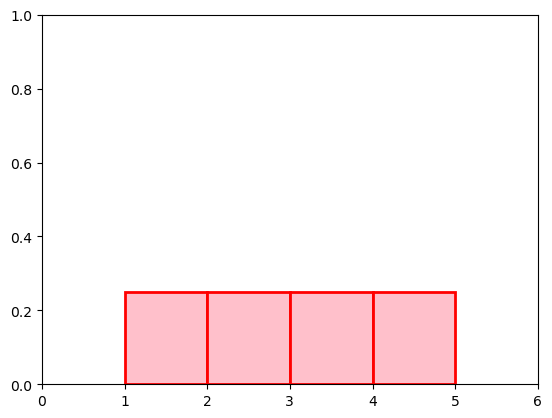

In [112]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(df_h_dist['경주마 번호'], range(1, 6), density=True, color="pink", edgecolor="red", linewidth=2)
plt.xlim(0, 6)
plt.ylim(0, 1)
plt.show()

#### 확률질량함수 (Probablity Mass Function, pmf)
- 확률변수 X의 분포를 나타내는 함수로서, x<sub>i</sub>가 나올 확률이다.
- 확률변수의 값을 매개변수로 전달받고, 해당 값이 나타날 확률을 구해서 리턴하는 함수이다.
- 범주형 확률 변수와 이산형 확률변수에서 사용된다.
- 확률변수에서 각 값에 대한 확률을 나타내는 것이 마치 각 값이 "질량"을 가지고 있는 것처럼 보이기 때문에 확률질량함수로 불린다.

> 확률질량함수 f는 확률변수 X가 x를 변수값으로 가질 때의 확률이다.  
> <img src="./images/pmf01.png" style="margin-top: 10px;">  
> <img src="./images/pmf02.png">  
> <img src="./images/pmf03.png">

In [111]:
import numpy as np
import pandas as pd

df_h = pd.DataFrame(np.random.randint(1, 5, size=(100, 1)), columns=["경주마 번호"])

df_h_group = df_h.groupby("경주마 번호")["경주마 번호"].count().reset_index(name="1등 횟수")

df_h_group["1등 할 확률"] = df_h_group["1등 횟수"] / 100

display(df_h_group)

경주마 번호  1등 횟수  1등 할 확률
0       1     23     0.23
1       2     26     0.26
2       3     31     0.31
3       4     20     0.20

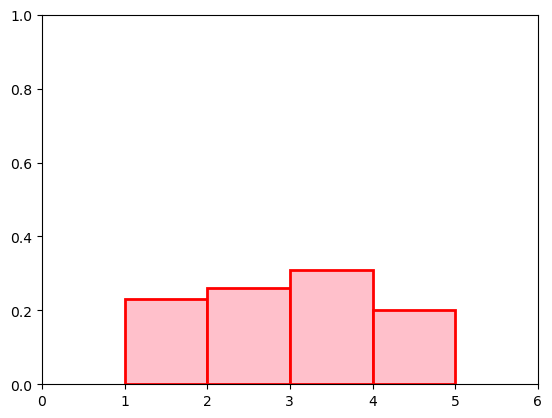

In [117]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(df_h['경주마 번호'], range(1, 6), density=True, \
        color="pink", edgecolor="red", linewidth=2)

plt.xlim(0, 6)
plt.ylim(0, 1)
plt.show()

#### 무한대 (Infinity)
- 끝없이 커지는 상태를 의미하고, 기호로 ∞를 사용한다.

#### 무한소 0 (Infinitesimal)
- 거의 없다는 의미이고, 0에 매우 근접하지만 0은 아닌 상태를 의미한다.

#### 미분 (Differential)
- 기울기는 독립변수가 종속변수에 미치는 영향력의 크기를 의미한다.
- 변경 전의 독립변수가 변경 전의 x<sub>1</sub>이라는 점과, 변경 후의 x<sub>2</sub>라는 점을 지나는 직선의 기울기가  
  바로 변화에 대한 속도이다.
- 즉, 직선의 기울기가 4로 구해졌다면, 종속변수가 독립변수의 변화에 4배 속도로 변화된 것이다.
- 이 때, 두 점 사이가 무한히 가까워지면, 결국 거의 한 점과 같은 점에 대한 접선의 기울기가 되고, 이는 순간적인 변화량이다.
- 미분을 통해서 독립변수가 굉장히 미세하게 변화할 때, 순간적으로 종속변수가 얼마나 빠르게 변화하는 지를 알 수 있다.

#### 적분 (Integral)
- 선분 = 높이(길이), 면적 = 가로 * 높이
- 면적을 구할 때, 여러 사각형으로 나눈 다음 전부 합해도 전체 면적이 나온다.
- 가로의 길이가 무한소 0인 사각형 즉, 선분과 거의 비슷한 사각형을 쌓은 뒤, 각 사각형의 면적을 모두 합하는 것이 적분이다.

#### 확률밀도함수 (Probablity Density Function, pdf)
- 확률변수 X의 분포를 나타내는 함수로서, 특정 구간에 속할 확률이며, 이는 특정 구간을 적분한 값이다.
- 확률변수값의 범위(구간)를 매개변수로 전달받고, 범위의 넓이를 구해서 리턴하는 함수이다.
- 연속형 확률변수에서 사용된다.
- 전체에 대한 확률이 아닌, 구간에 포함될 확률을 나타내기 때문에 구간에 따른 밀도를 구하는 것이고, 이를 통해 밀도함수라고 불린다.

> 확률밀도함수 f는 특정 구간에 포함될 확률을 나타낸다.  
> <img src="./images/pdf01.png" style="margin-top: 10px;">  
> <img src="./images/pdf02.png">  
> <img src="./images/pdf03.png">  
> <img src="./images/pdf04.png">

구간 [-1, 2]에서의 확률: 0.8185946141203638


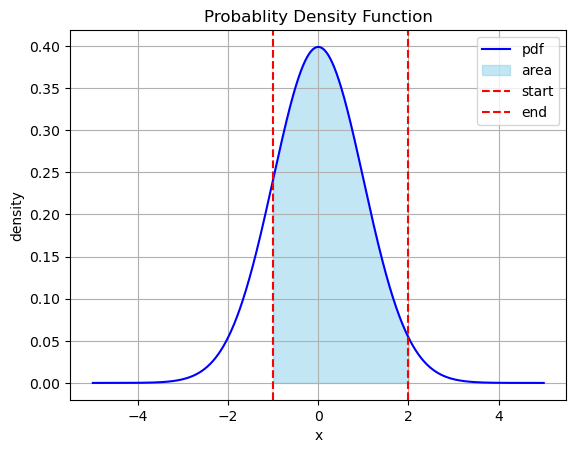

In [136]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def pdf(x):
    # 정규분포
    mu = 0
    sigma = 1
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-((x - mu) / sigma) ** 2 / 2)

# 랜덤한 구간
a = -1
b = 2

def calculate_probablity_in_range(a, b):
    probablity, _ = quad(pdf, a, b)
    return probablity

probablity = calculate_probablity_in_range(a, b)
print(f'구간 [{a}, {b}]에서의 확률: {probablity}')

x_values = np.linspace(-5, 5, 10000)
y_values = pdf(x_values)

plt.plot(x_values, y_values, label='pdf', color='blue')

plt.fill_between(x_values, y_values\
                 , where=(x_values >= a) & (x_values <= b)\
                 , color='skyblue', alpha=0.5, label='area')

plt.axvline(x=a, linestyle='--', color='red', label='start')
plt.axvline(x=b, linestyle='--', color='red', label='end')

plt.xlabel('x')
plt.ylabel('density')

plt.title("Probablity Density Function")
plt.legend()
plt.grid(True)
plt.show()

#### 정규분포 (Normal Distribution)
- 모든 독립적인 확률변수들의 평균은 어떠한 분포에 가까워지는데, 이 분포를 정규분포라고 한다.
- 즉, 비정규분포의 대부분은 극한상태에 있어서 정규분포에 가까워진다.  

<img src="./images/normal_distribution01.png" width="500px"> <img src="./images/normal_distribution02.png" width="500px">  
- 평균 μ(mu)와 표준편차 σ(sigma)에 대해 아래의 확률밀도함수를 가지는 분포를 의미한다.  

<div style="display: flex">
    <div>
        <img src="./images/normal_distribution03.png" width="230px" style="margin-left: 20px">  
    </div>
    <div>
        <img src="./images/normal_distribution04.png" width="700px" style="margin-left: 20px">  
    </div>
</div>

#### 표준 정규분포 (Standard Normal Distribution)
- 정규분포는 평균과 표준편차에 따라서 모양이 달라진다.

<img src="./images/standard_normal_distribution01.png" width="400px">

- 정규분포를 따르는 분포는 많지만, 각각의 평균과 표준편차가 달라서 일반화할 수 없다.
- N(μ, σ) = N(0, 1)로 만든다면 모두 같은 특성을 가지는 동일한 확률분포로 바꿔서 일반화할 수 있다.
- 따라서 일반 정규분포를 표준 정규분포로 바꾼 뒤,  
  표준 정규분포의 특정 구간의 넓이를 이용해서 원래 분포의 확률을 구할 수 있다.  

<img src="./images/standard_normal_distribution02.png" width="400px">

#### 표준화 (Standardization)
- 다양한 형태의 정규분포를 표준 정규분포로 변환하는 방법이다.
- 표준 정규분포에 대한 값(넓이)을 이용해 원래 분포의 확률을 구할 수 있다.  

<img src="./images/standardization01.png" style="margin-left: 20px">  

<img src="./images/standardization02.png" style="margin-left: 20px">

#### 모집단과 모수 (Population and Population Parameter)
- 모집단이란, 정보를 얻고자 하는 대상의 전체 집합을 의미한다.
- 모수란, 모집단의 수치적 요약 값을 의미한다. 평균 또는 표준편차와 같은 모집단의 통계값을 모수라고 한다.

#### 표본과 샘플링 (Sample and Sampling)
- 표본이란, 모집단의 부분집합으로서 표본의 통계량을 통해 모집단의 통계량을 추론할 수 있다.
- 모집단의 통계량을 구할 수 없는 상황 즉, 전수 조사가 불가능한 상황에서 임의의 표본을 추출하여 분석한다.
- 이렇게 표본(Sample)을 추출하는 작업을 샘플링(Sampling)이라고 한다.

### 데이터 분석의 범위
<img src="./images/statistics02.png" width="400px" style="margin-left: 10px;">  

#### 기술 통계 (Descriptive Statistics)
- 수집한 데이터의 요약을 통해서 데이터를 설명(묘사)하는 기법이다.
- 수집한 데이터의 전체적인 모양을 그리기 위해 기술 통계 기법을 사용한다.
- 집중화 경향 (Central Tendency): 평균(Mean), 중앙값(Median), 최빈값(Mode)
- 분산도 (Variation): 표준편차(Standard Deviation), 사분위(Quartile)


#### 추론 통계 (Inferential Statistics)
- 수집한 데이터를 기반으로 특성(패턴)을 알아낸 뒤, 특정 데이터를 추론하거나 예측하는 기법이다.
- 모집단(Population)에서 일정 표본(Sample)을 채취한 뒤, 표본에 대한 통계를 구하여 모집단에 대해 추론한다.  
  이를 통해 결론에 도달하는 기법이다.
- 데이터 전체를 조사할 수 없을 때, 랜덤한 표본을 분석해서 나온 결과를 전체적으로 일반화시킬 때 유용하다.